In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titan_df = pd.read_csv('./titanic//train.csv')

In [3]:
titan_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
# 결측값, Age, Cabin, Embarked
def fillna_null(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True) # 원본을 변형하는 inplace true 적용
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    
    return df

In [5]:
# label encoding
from sklearn.preprocessing import LabelEncoder

def le_encode(df):
    features = ['Name','Sex', 'Ticket', 'Cabin', 'Embarked']
    for ftr in features:
        le = LabelEncoder() # le로 객체화
        le=le.fit(df[ftr])
        df[ftr]=le.transform(df[ftr])
    return df

In [6]:
# ML알고리즘에 불필요 속성(attr: columns) 제거
# 'Ticket', 'Name','PassengerId', 'Cabin', 'Embarked' 컬럼들 삭제
def drop_ftr(df):
    df.drop(['Ticket', 'Name','PassengerId', 'Cabin', 'Embarked'], axis=1, inplace=True)
    return df

In [7]:
# 앞에서 설정한 데이터 통합
def transform_ftrs(df):
    df = fillna_null(df)
    df = le_encode(df)
    df = drop_ftr(df)    
    return df

# 01 정확도(Accuracy)  

정확도(Accuracy)는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표이다.   

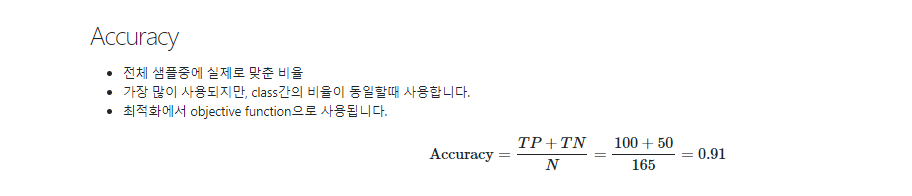

#### 하지만 이진 분류 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도(Accuracy) 수치 하나만 가지고 성능을 평가하지 않는다. 

#### 정확도 지표가 어떻게 ML 모델의 성능을 왜곡하는지 예제로 살펴보자.

앞의 타이타닉 예제 수행 결과를 보면 한 가지 의문점이 들게 된다. ML 알고리즘을 적용 후 예측 정확도의 결과가 보통 80%대 였지만, 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에 별다른 알고리즘의 적용 없이 무조건 성별이 여자인 경우 생존으로, 남자인 경우 사망으로 예측결과를 예측해도 이와 비슷한 수치가 나올 수 있다. 단지 성별조건 하나만을 가지고 결정하는 별거 아닌 알고리즘도 높은 정확도를 나타내는 상황이 발생할 수 있다. # 

다음 예제에서는 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성한다. 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator를 개발자가 생성할 수 있다. 생성할 MyDummyClassifier 클래스는 학습을 수행하는 fit() 메서드는 아무것도 수행하지 않으며 예측을 수행하는 predict()메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 매우 단순한 Classifier이다. 새로운 주피터로 다음 코드를 입력해보자.   

In [8]:
from sklearn.base import BaseEstimator

In [9]:
# TestClassifier를 통해 단순한 알고리즘 함수 생성
class TestClassifier(BaseEstimator):
    # fit ()메서드는 학습하지 않는다.
    def fit(self, X, y= None):
        pass
    # predict()메서드는 단순히 Sex 
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] ==1:  # 성별의 value값이 남성이라면 :: female = 0, male = 1
                pred[i] = 0
            else:
                pred[i]=1
        return pred

In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #정확도 지표 하나만!!!

In [11]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할

titanic_df = pd.read_csv('./titanic//train.csv')

y_titanic_df = titan_df['Survived']
X_titanic_df = titan_df.drop('Survived', axis=1)

X_titanic_df=transform_ftrs(X_titanic_df)

In [12]:
# train데이터 내에서 validation 데이터로 분할

X_train, X_val, y_train, y_val = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2,
                                                   random_state=0)

In [13]:
t_clf = TestClassifier()
t_clf.fit(X_train,y_train)
dum_clf_pred = t_clf.predict(X_val)
print('Dummy_clf의 정확도는:', np.round(accuracy_score(y_val,dum_clf_pred),4))

Dummy_clf의 정확도는: 0.7877


이렇게 단순하나 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 약 78.77%로 꽤 높은 수치가 나올 수 있기에 정확도를 평가 지표로 사용할 때는 매우 신중해야 한다. 특히 정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다.   

#### 예를 들어 100개의 데이터가 있고 이중에 90개의 데이터 레이블이 0, 단 10개의 데이터 레이블이 1이라고 한다면 무조건 0으로 예측 결과를 반환하는 ML 모델의 경우라도 정확도가 90%가 된다. 

유명한 MNIST 데이터 세트를 변환해 불균형한 데이터 세트로 만든 뒤에 정확도 지표 적용 시 어떤 문제가 발생할 수 있는지 살펴보도록 하자.
MNIST 데이터 세트는 0부터 9까지의 숫자 이미지의 픽셀 정보를 가지고 있으며, 이를 기반으로 숫자 DIgit을 예측하는데 사용된다. 사이킷런은 load_digits() API를 통해서 MNIST 데이터 세트를 제공한다. 원래 MNIST 데이터 세트는 레이블 값이 0부터 9까지 있는 멀티 레이블 분류를 위한 것이다. 이것을 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환해 이진 분류 문제로 살짝 바꿔서 진행해보자. 즉, 전체 데이터의 10%만 True, 나머지 90%는 False인 불균형한 데이터 세트로 변형하는 것이다.  

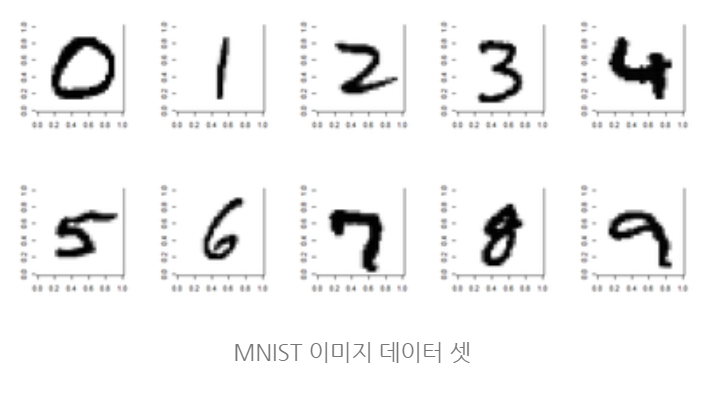 

이렇게 불균형한 데이터 세트에 모든 데이터를 False, 즉 0으로 예측하는 classifier를 이용해 정확도를 측정하면 약 90%에 가까운 예측 정확도(accuracy)를 나타낸다. 아무것도 하지 않고 무조건 특정한 결과로 찍어도(?) 데이터 분포도가 균열하지 않은 경우 높은 수치가 나타날 수 있는 것이 정확도 평가 지표의 맹점이다. 

In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class Mydummy(BaseEstimator):
    def fit(self, X,y):
        pass
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만듦
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 활용하여 MNIST 데이터를 로딩
digits = load_digits()

# digit 번호가 7이라면, True이고 이를 astype(int)를 통해서 1로 변환
## 우리의 알고리즘은 7이 아니면 False, 7이면 True의 논리로 예측하고
## 이 예측된 결과를 정확도(accuracy_score)로 예상함
y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, test_size=0.25, 
                                                    random_state=11)

In [15]:
y=(digits.target==7).astype(int)

다음으로 불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인하고 Mydummy를 이용해 예측과 평가를 수행해보자  

In [16]:
# imbalanced label data distribution check
print('label test datasets size:', y_test.shape)
print('test datasets :: 0과 1의 분포\n', pd.Series(y_test).value_counts())

# MyDummy를 통한 fit/predict/eval

My_dum_clf = Mydummy()
My_dum_clf.fit(X_train,y_train) # 아무것도 학습하지 않는다
fake_pred = My_dum_clf.predict(X_test) # 아무것도 학습하지 않는다

print('모든 예측이 0이라 해도 accuracy는 {0:.4f}이다'.format(accuracy_score(y_test, fake_pred)))

label test datasets size: (450,)
test datasets :: 0과 1의 분포
 0    405
1     45
dtype: int64
모든 예측이 0이라 해도 accuracy는 0.9000이다


In [17]:
fake_pred.sum()

0

In [18]:
class Mydummy(BaseEstimator):
    def fit(self, X,y):
        pass
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만듦
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

# 02 Confusion Matrix 

분류(Classification)문제에서 성능 지표로 가장 잘 활용되고 있는 혼동행렬(confusion matrix, 오차행렬이라고도 함)에 대해서 설명해보겠다. 이 Confusion Matrix는 학습된 분류 모델이 예측을 수행하면서 얼마나 틀리고 헷갈리는 답을 하는지도 함께 보여주는 지표이다. 즉, 이진 분류의 예측 오류의 크기와 유형도 함께 나타내 준다 

Confusion Matrix는 다음과 같은 4사분면 행렬에서 Actual Class 값과 Predicted Class 값이 어떠한 유형을 가지고 Mapping되는지를 나타낸다. 4분면의 왼쪽, 오른쪽을 예측된 클래스 값 기준으로 Negative와 Positive로 분류하고, 4분면의 위, 아래를 Actual Value 기준으로 Negative와 Positive로 분류하면 Predicted Class와 Actual Class의 값 유형에 따라 결정되는 TN,FP,FN,TP 형태로 오차 행렬의 4분면을 채울 수 있다. TN,FP,FN,TP값을 다양하게 결합해 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는 지 알 수 있는 것이다. 

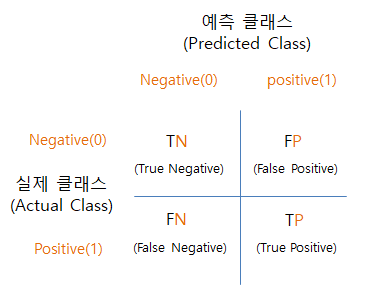 

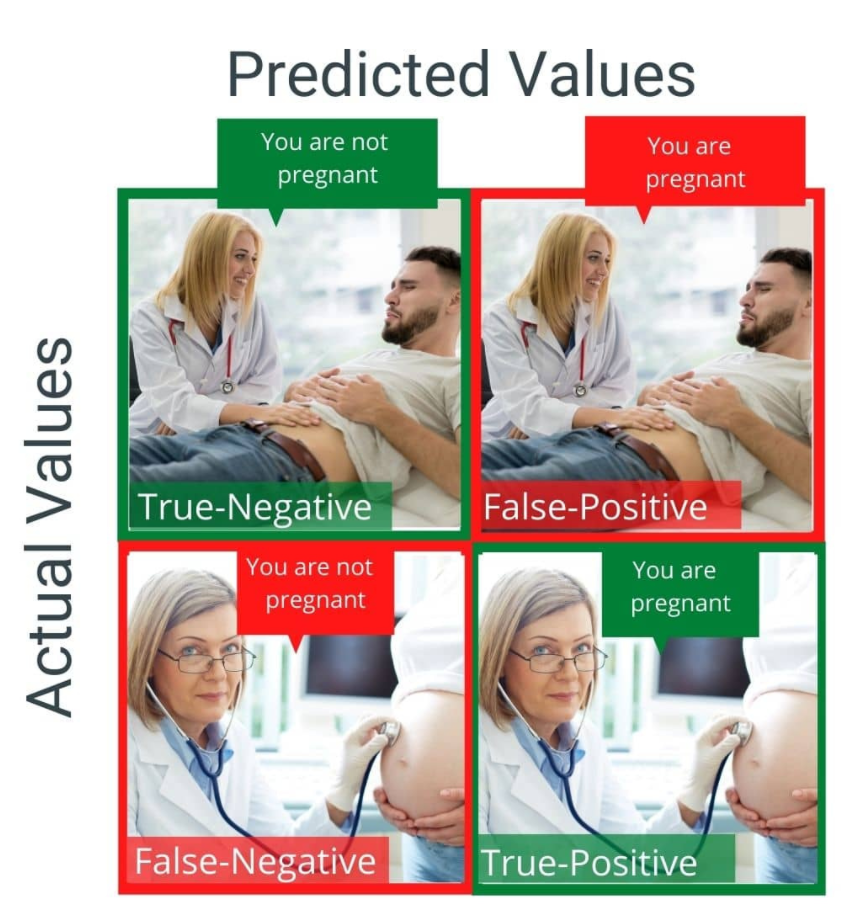

In [19]:
from sklearn.metrics import confusion_matrix 

confusion_matrix(y_test, fake_pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

출력된 자료형태는 ndarray이며 해당 ndarray는 위의 Confusion_matrix 에서 테스트 데이터 세트의 클래스 값 분포는 0이 405건, 1이 45건이다. 따라서 TN은 전체 450건 데이터 중 무조건 Negative 0으로 예측해서 실제 클래스의 Negative 405건, FN은 실제 클래스의 Positive 45건으로써 예측에서 틀린(False) 경우를 세었다는 것을 알 수 있다.

# 03 정밀도와 재현율

 * 정밀도(Precision) = TP / (FP+TP)
 * 재현율(Recall) = TP / (FN+TP)  --> 민감도(sensitivity) = TPR  

### * 재현율이 중요지표인 경우 : 실제 Positive 양성 데이터를 Negative로 잘못 판단시 업무상 매우 큰 영향이 발생하는 경우 

    > 예를 들어 암 진단의 경우에는 재현율이 정밀도보다 더욱 중요하다. 그 이유는 실제 Positive(암환자)를
      Negative(음성)으로 잘못 판단했을 경우, 생명이 위협되기 때문이다.
      
      
    > 이에 반해 실제 'Negative'인 건강한 환자를 암 환자인 positive로 예측했다면, 검사비용 정도만
      소모되면 된다.
      
      
    > 보험 사기(fraud detection)와 같은 금융 사기 적발 모델도 재현율이 더욱 중요한 지표라 할 수 있다.
      실제 금융사기인 Positive를 Negative로 판단하게 되면 회사에 막대한 손해가 가게 된다.
      하지만, 정상거래를 사기거래로 의심하게 되더라도 재확인을 하면 되기 때문이다.
      
      
      물론, 고객에게 금융 사기 혐의를 잘못 씌우면 문제가 될 수 있으므로 정밀도도 중요하나, 업무적 특성
      상 재현율이 더욱 중요하다 할 수 있다. 

### * 정밀도가 중요지표인 경우 : 실제 Negative 음성 데이터를 positive로 잘못 판단시 업무상 매우 큰 영향이 발생하는 경우

    > 예를 들어 스팸메일 여부를 판단하는 모델의 경우 실제 Positive인 스팸 메일을 Negative인 일반 메일로
      분류하더라도 사용자가 불편함을 느끼는 정도이나, 실제 Negative인 일반 메일을 Positive인 스팸 메일로
      분류할 경우에는 메일을 아예 받지 못하게 된다.

In [20]:
# 필요지표들을 통합하여 함수를 만들어보아요 ^^

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def clf_metric(y_test, pred):
    c_matrix = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    p_score = precision_score(y_test,pred)
    r_score = recall_score(y_test,pred)
    
    print('confusion matrix')
    print(c_matrix)
    print('정확도:',np.round(accuracy,4),'precision:',np.round(p_score,4), 'recall:', np.round(r_score,4))

In [21]:
# 로지스틱 회귀만으로 타이타닉 데이터를 분석

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

# org_data를 로딩 후 preprocessing and train_test_split
t_df = pd.read_csv('./titanic/train.csv')
target = t_df['Survived']
ftr = t_df.drop(['Survived'],axis=1)
ftr_rev = transform_ftrs(ftr)

X_train, X_valid, y_train, y_valid = train_test_split(ftr_rev, target, test_size=.2,
                                                     random_state=11)
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred_lr_val = lr_clf.predict(X_valid)
clf_metric(y_valid,pred_lr_val)

confusion matrix
[[103  15]
 [ 13  48]]
정확도: 0.8436 precision: 0.7619 recall: 0.7869


### Trade off of precision / recall

* 결정 임계값(Threshold)을 조정해서 정밀도 또는 재현율의 수치를 조정할 수 있다. 

* 예측확률을 반환하는 메소드는 predict_proba()를 제공 

     일반적으로 이진분류에서의 임계값(Threshold) :: 0.5
     0.5보다 값이 크다면 --> Positive
     
     0.5보다 작다면 --> Negative로 결정 

 이진 분류에서 predict_proba()를 수행해서 반환되는 ndarray는 첫 번째 컬럼이 클래스 값 0에 대한 확률, 두 번째 컬럼이 클래스 1에 대한 확률이다.

In [22]:
pred_proba_lr = lr_clf.predict_proba(X_valid)
pred = lr_clf.predict(X_valid)
print('pred_proba()결과 shape:',pred_proba_lr.shape)
print('pred_proba_lr array에서 앞 3개만 샘플로 추출:\n',pred_proba_lr[:3])

pred_proba()결과 shape: (179, 2)
pred_proba_lr array에서 앞 3개만 샘플로 추출:
 [[0.45235337 0.54764663]
 [0.87413894 0.12586106]
 [0.88411838 0.11588162]]


In [23]:
pred_proba_result = np.concatenate([pred_proba_lr,pred.reshape(-1,1)],axis=1)
pred_proba_result

print('두 개의 class중에서 더 큰 확률을 해당클래스로 예측\n', pred_proba_result[:3])

두 개의 class중에서 더 큰 확률을 해당클래스로 예측
 [[0.45235337 0.54764663 1.        ]
 [0.87413894 0.12586106 0.        ]
 [0.88411838 0.11588162 0.        ]]


In [24]:
from sklearn.preprocessing import Binarizer

In [25]:
x= [[1,-2,5],
   [10,-1,-1],
   [0, 1.1, 1.3]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold=1.5)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]


In [26]:
# Threshold의 변경을
# 기존의 위에서 정의한 clf_metric에 적용

from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류를 결정하는 임계치...
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 컬럼, 즉 Positive 클래스 컬럼하나만 추출
# 그 컬럼에 Binarizer를 적용

pred_proba_1 = pred_proba_lr[:,1].reshape(-1,1) # 결과 클래스의 확률에서 1이 될 확률만 추출함....

# Binarizer 적용
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_threshold=binarizer.transform(pred_proba_1) # 바뀐 threshold가 적용되어 출력된 예측값
                                                   # 1 또는 0이 출력될 것임 :: 이 값은 threshold에 따라 변화함

clf_metric(y_valid, custom_threshold)

confusion matrix
[[103  15]
 [ 13  48]]
정확도: 0.8436 precision: 0.7619 recall: 0.7869


In [27]:
# 위에서의 custom_threshold의 설정값을 0.4로 변경하면, 분류 결정 임계치가 0.5 ~> 0.4로 낮춰짐
custom_threshold = 0.4
pred_proba_1 = pred_proba_lr[:,1].reshape(-1,1)
binarizer = Binarizer(threshold= 0.4).fit(pred_proba_1)
custom_pred1 = binarizer.transform(pred_proba_1)

clf_metric(y_valid, custom_pred1)

confusion matrix
[[98 20]
 [11 50]]
정확도: 0.8268 precision: 0.7143 recall: 0.8197


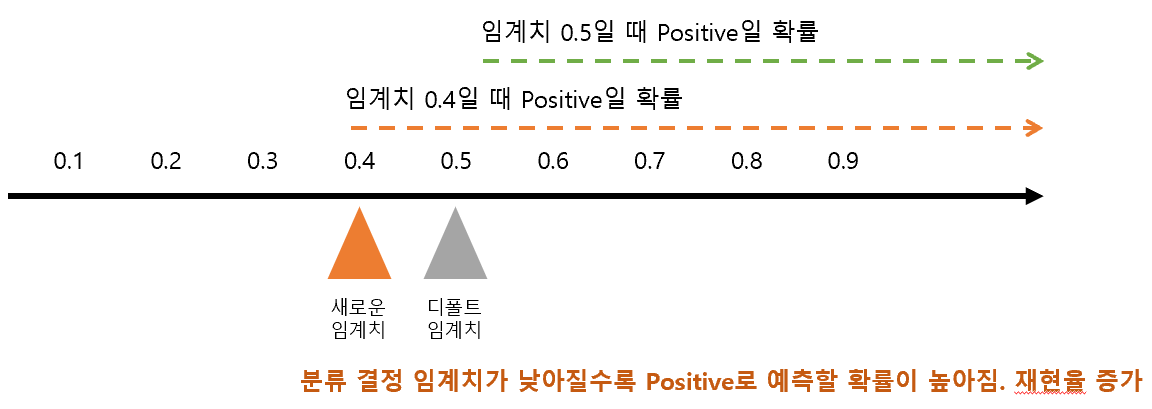 

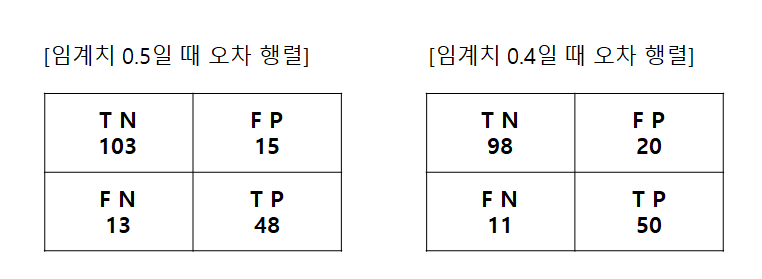 

임계치가 0.5에서 0.4로 낮아지면서, 재현율은 높아졌고, 정밀도는 낮아졌다.

위와 같이 threshold를 조절하면서 우리는 정밀도나 재현율이 중요지표인 산업에서
조금 더 좋은 성능지표를 개발해 나갈 수 있다.

In [53]:
# precision_recall_curve() API를 통해서 titan_df의 precison 및 recalll 구현
from sklearn.metrics import precision_recall_curve

# label_class가 1일 때의 예측확률을 추출해보자.
pred_proba_class_1 = lr_clf.predict_proba(X_valid)[:,1]

## 실제값 데이터 세트:: Actual_y와 레이블 값을 예측한 pred_proba_class_1을 
## precision_recall_curve의 입력값으로 입력
precisions, recalls, thresholds = precision_recall_curve(y_valid,pred_proba_class_1)
print('반환된 분류 결정 임계치(threshold)의 shape:', thresholds.shape)

# 반환된 임계치의 배열 shape이 154 건이므로 임계치를 16 interval로 10건씩 추출
threshold_index = np.arange(0, thresholds.shape[0],16)
print('샘플 추출을 위한 threshold  배열의 index 10개:', threshold_index)
print('샘플용 10개의 thresholds:', np.round(thresholds[threshold_index],3))

반환된 분류 결정 임계치(threshold)의 shape: (154,)
샘플 추출을 위한 threshold  배열의 index 10개: [  0  16  32  48  64  80  96 112 128 144]
샘플용 10개의 thresholds: [0.083 0.108 0.12  0.15  0.251 0.347 0.516 0.644 0.796 0.925]


In [56]:
# 위의 thresholds의 변화에 따른 정밀도와 재현율의 변화
print('샘플 threshold별 precision:',np.round(precisions[threshold_index],3))
print('샘플 threshold별 recall:',   np.round(recalls[threshold_index],3))

샘플 threshold별 precision: [0.361 0.386 0.449 0.495 0.579 0.688 0.8   0.907 0.963 1.   ]
샘플 threshold별 recall: [1.    0.967 0.934 0.902 0.902 0.869 0.787 0.639 0.426 0.18 ]


결론 :: threshold(임계치)가 증가할수록 precision(정밀도)값은 높아지나, recall(재현율)의 값은 낮아지므로, 두 지표의 관계는 trade_off(반비례 관계)임을 알 수 있다 

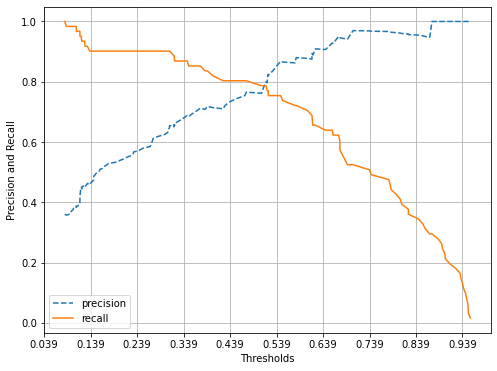

In [71]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

precisions, recalls, thresholds = precision_recall_curve(y_valid,pred_proba_class_1)

# X축을 threshold값으로, Y축의 경우에는 precision, recalll 값이 나오도록 graph
# precision은 점선(dotted)

plt.figure(figsize = (8,6))
boundary_threshold = thresholds.shape[0]
plt.plot(thresholds, precisions[0:boundary_threshold], linestyle='--', label='precision')
plt.plot(thresholds, recalls[0:boundary_threshold], label='recall')

# threhsold값을 X축의 단위를 0.1단위로 적용
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),3))

# X축과 y축의 label과 legend도 추가, 그리고 grid설정

plt.xlabel('Thresholds');plt.ylabel('Precision and Recall')
plt.legend();plt.grid()

plt.show()

In [72]:
def pr_curve_plt(y_valid, pred_proba_c):
    precisions, recalls, thresholds = precision_recall_curve(y_valid, pred_proba_c)

    # X축을 threshold값으로, Y축의 경우에는 precision, recalll 값이 나오도록 graph
    # precision은 점선(dotted)

    plt.figure(figsize = (8,6))
    boundary_threshold = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:boundary_threshold], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:boundary_threshold], label='recall')

    # threhsold값을 X축의 단위를 0.1단위로 적용
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),3))

    # X축과 y축의 label과 legend도 추가, 그리고 grid설정

    plt.xlabel('Thresholds');plt.ylabel('Precision and Recall')
    plt.legend();plt.grid()

    plt.show()

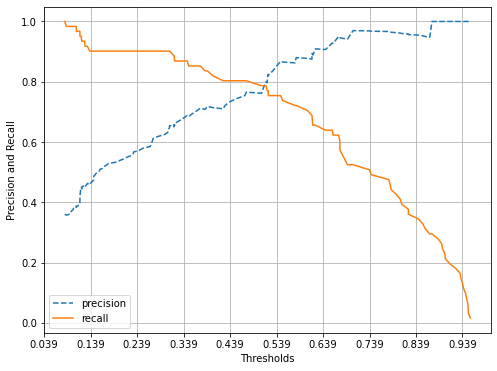

In [73]:
pr_curve_plt(y_valid, lr_clf.predict_proba(X_valid)[:,1])

# 04 정밀도와 재현율의 조화평균 :: F1_score

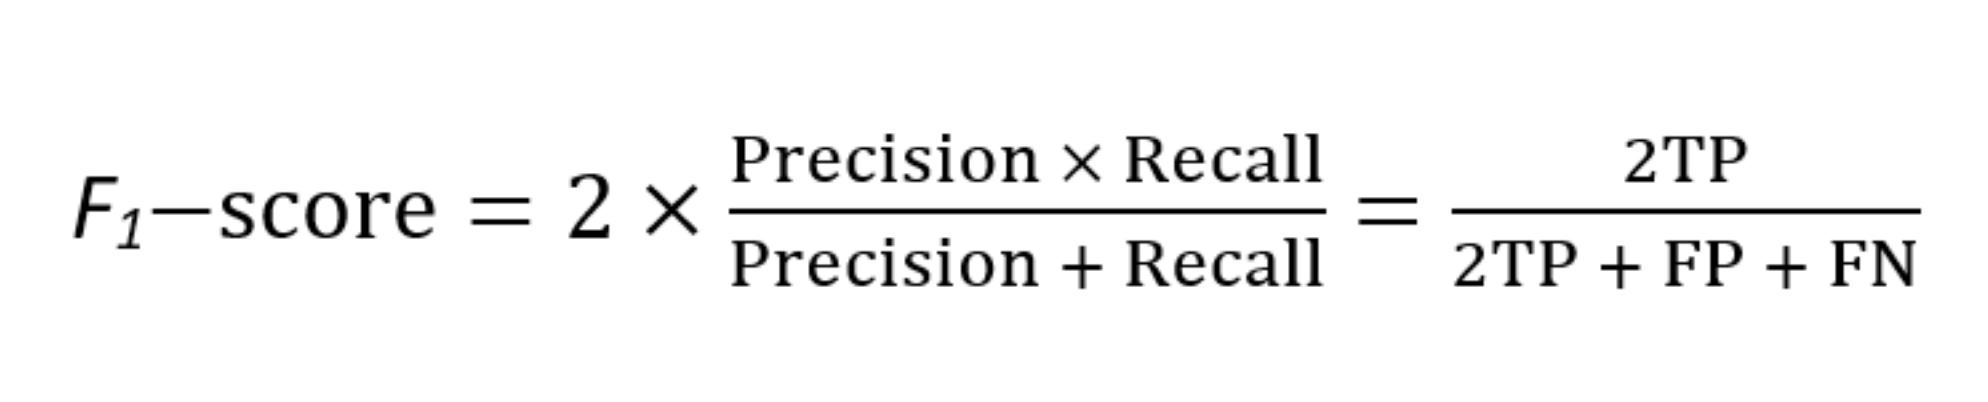

만일 A 예측 모델의 경우 재현율이 0.9, 정밀도가 0.1로 극단적인 차이를 갖고, B 예측 모델은 재현율이 0.5, 정밀도가 0.5라면 ::

A 모델의 F1_Score = 0.18

B 모델의 F1_Score = 0.5 

In [74]:
# f1_score 호출

from sklearn.metrics import f1_score
f1 = f1_score(y_valid,pred_lr_val)
print('f1 score:',np.round(f1,4))

f1 score: 0.7742


In [79]:
# 필요지표들을 통합하여 함수를 만들어보아요 ^^

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

def clf_metric(y_test, pred):
    c_matrix = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    p_score = precision_score(y_test,pred)
    r_score = recall_score(y_test,pred)
    
    #f1_score 추가
    f1 = f1_score(y_valid,pred)    
    print('confusion matrix')
    print(c_matrix)
    
    #f1_score print 문장에 추가
    print('정확도:',np.round(accuracy,4),'precision:',np.round(p_score,4), 
          'recall:', np.round(r_score,4),
          'f1_score:',np.round(f1,4))

### ROC 곡선

In [ ]:
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train,y_trian)
# dt_clf.predict(X_test) --> class를 결정
dt_clf.predict_proba(X_test)[:,1] --> 결정되기까지의 확률을 추출해줌...

In [ ]:
lr_clf = LogisticRegression(random_state=156)

In [101]:
## 여전히 타이타닉 생존자 예측을 활용
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_valid)[:,1]

fprs, tprs, thresholds1 = roc_curve(y_valid, pred_proba_class1)


# 반환된 임계치(threshold)에서 샘플로 데이터를 추출하되, step(숫자를) 5 간격으로 추출
# thresholds[0]은 max(예측확률)+1로 임의설정됨 이를 제외하기 위해 np.arange를 1로 시작
thr_index = np.arange(1, thresholds1.shape[0], 5) # 임계치의 인덱싱을 뽑음
print('샘플 추출을 위한 thresholds_index:', thr_index)
print('샘플 thresholds_index를 적용하여 추출된 값:', np.round(thresholds1[thr_index],3))

# 5step 단위로 위의 threshold에 따른 FPR과 TPR 값
print('샘플 임계치별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임계치별 TPR:', np.round(tprs[thr_index],3))

샘플 추출을 위한 thresholds_index: [ 1  6 11 16 21 26 31 36 41 46 51 56]
샘플 thresholds_index를 적용하여 추출된 값: [0.956 0.704 0.644 0.581 0.519 0.424 0.347 0.272 0.126 0.116 0.116 0.087]
샘플 임계치별 FPR: [0.    0.008 0.034 0.051 0.102 0.169 0.203 0.305 0.576 0.678 0.737 0.915]
샘플 임계치별 TPR: [0.016 0.525 0.639 0.721 0.77  0.803 0.869 0.902 0.934 0.951 0.967 0.984]


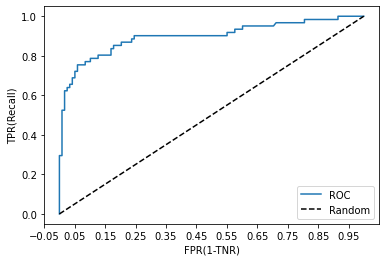

In [102]:
# roc 곡선 시각화
# fprs, tprs, thresholds = roc_curve(y_valid, pred_proba_class1)
import matplotlib.pyplot as plt

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1],'k--', label='Random')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.xlabel('FPR(1-TNR)');plt.ylabel('TPR(Recall)')
plt.legend()
plt.show()